<a href="https://colab.research.google.com/github/fawaid98/portfolio/blob/main/Stock_Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.formats.format import DataFrameFormatter

In [2]:
code = ['BBCA','BBNI','BBRI','BBTN','BMRI']

price = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/price_porto.csv')
#print(price[code])

rtr = (price[code] - price[code].shift(1))/price[code].shift(1)
rt1 = np.nan_to_num(np.array(rtr[code[0]][1:]))
rt2 = np.nan_to_num(np.array(rtr[code[1]][1:]))
rt3 = np.nan_to_num(np.array(rtr[code[2]][1:]))
rt4 = np.nan_to_num(np.array(rtr[code[3]][1:]))
rt5 = np.nan_to_num(np.array(rtr[code[4]][1:]))
data = np.array([rt1.tolist(), rt2.tolist(), rt3.tolist(), rt4.tolist(), rt5.tolist()])
cov = np.cov(data)
icov = np.linalg.inv(cov)
mu = np.array([[rt1.mean()],[rt2.mean()],[rt3.mean()],[rt4.mean()],[rt5.mean()]])
e = np.array([[1],[1],[1],[1],[1]])

#print('data', data)
print('cov',cov)
print('icov', icov)
print('mu', mu)
print('e', e)

cov [[0.00028979 0.00024128 0.00023201 0.00022277 0.00024602]
 [0.00024128 0.00059627 0.00041607 0.00047847 0.00044572]
 [0.00023201 0.00041607 0.0005555  0.00038936 0.00039901]
 [0.00022277 0.00047847 0.00038936 0.00084531 0.00041134]
 [0.00024602 0.00044572 0.00039901 0.00041134 0.00055673]]
icov [[ 6004.577411    -655.09694376  -968.98778999  -105.05851187
  -1356.82546528]
 [ -655.09694376  5669.12295571 -1455.54671281 -1258.04300207
  -2276.56022214]
 [ -968.98778999 -1455.54671281  4544.14284278  -319.20100932
  -1427.46415851]
 [ -105.05851187 -1258.04300207  -319.20100932  2257.3843136
   -385.45824239]
 [-1356.82546528 -2276.56022214 -1427.46415851  -385.45824239
   5526.28341514]]
mu [[ 5.85760728e-04]
 [-4.30869990e-05]
 [ 4.17798310e-04]
 [-2.61068124e-04]
 [ 1.25231890e-04]]
e [[1]
 [1]
 [1]
 [1]
 [1]]


In [3]:
tau = [0, 0.001, 0.002, 0.0021, 0.0022, 0.00221, 0.00222, 0.00223, 0.00224, 0.00225, 0.002251, 0.002252, 0.002253, 0.002254, 0.002255, 0.002256 , 0.002257, 0.002258]
lamda = []
for i in range(0,len(tau)):
  a = e.T@icov@e
  b = (2*tau[i]*e.T@icov@mu) + (2*tau[i]*mu.T@icov@e)
  c = 2*(tau[i]**2)*mu.T@icov@mu - 1
  
  akar = np.sqrt((b**2) - (4*a*c))
  lam1 = -b + ((akar)/(2*a))
  lam2 = -b - ((akar)/(2*a))
  if lam1 > 0.0:
    lam = lam1.tolist()[0]
  elif lam2 > 0.0:
    lam = lam2.tolist()[0]
  else:
    lam = [0]

  lamda.append(lam[0])

print(f'lambda = {lamda}')

lambda = [0.016701435296288026, 0.009401821549946288, 0.0021022077824729354, 0.0013722464045633626, 0.0006422850264424761, 0.000569288888618763, 0.0004962927507929302, 0.0004232966129649983, 0.0003503004751349466, 0.00027730433730278545, 0.0002700047235194569, 0.0002627051097360972, 0.00025540549595272355, 0.00024810588216932564, 0.00024080626838591038, 0.00023350665460246736, 0.00022620704081901047, 0.00021890742703552582]


In [4]:
weight = []
for i in range(0, len(tau)):
  wa = 2*tau[i]*icov@mu + lamda[i]*icov@e
  wb = 2*tau[i]*e.T@icov@mu + lamda[i]*e.T@icov@e
  w = wa/wb
  weight.append(w.T[0])

print(f'weight = {np.array(weight)}')

weight = [[ 8.14110701e-01  6.65994318e-03  1.04028001e-01  5.28932020e-02
   2.23081530e-02]
 [ 8.14200437e-01  6.58845356e-03  1.04093762e-01  5.28412983e-02
   2.22760498e-02]
 [ 8.14912670e-01  6.02103869e-03  1.04615708e-01  5.24293368e-02
   2.20212464e-02]
 [ 8.15399943e-01  5.63284225e-03  1.04972798e-01  5.21474937e-02
   2.18469228e-02]
 [ 8.16990794e-01  4.36545888e-03  1.06138624e-01  5.12273326e-02
   2.12777912e-02]
 [ 8.17373347e-01  4.06069011e-03  1.06418971e-01  5.10060607e-02
   2.11409317e-02]
 [ 8.17867908e-01  3.66668770e-03  1.06781401e-01  5.07200022e-02
   2.09640008e-02]
 [ 8.18532107e-01  3.13754019e-03  1.07268147e-01  5.03358241e-02
   2.07263817e-02]
 [ 8.19471291e-01  2.38932050e-03  1.07956410e-01  4.97925926e-02
   2.03903859e-02]
 [ 8.20900806e-01  1.25046772e-03  1.09004005e-01  4.89657488e-02
   1.98789724e-02]
 [ 8.21085906e-01  1.10300422e-03  1.09139652e-01  4.88586855e-02
   1.98127524e-02]
 [ 8.21281202e-01  9.47417808e-04  1.09282771e-01  4.874

In [5]:
sum_w = []
mu_p = []
sig_p = []
r_p = []
for i in range (0, len(weight)):
  sw = sum(weight[i])
  sum_w.append(np.round(sw, decimals=2))

  mu_i = mu.T@weight[i]
  mu_p.append(mu_i[0])

  sig_i = np.sqrt(weight[i].T@cov@weight[i])
  sig_p.append(sig_i)

  r = mu_p[i]/sig_p[i]
  r_p.append(r)

bobot = np.array(weight).T.tolist()

df = pd.DataFrame(data={'tau':tau, 'S1':bobot[0], 'S2':bobot[1], 'S3':bobot[2], 'S4':bobot[3], 'S5':bobot[4], 'mu':mu_p, 'sig':sig_p, 'r':r_p})
df

,tau,S1,S2,S3,S4,S5,mu,sig,r
0,0.000000,0.814111,0.006660,0.104028,0.052893,0.022308,0.000509,0.016701,0.030479
1,0.001000,0.814200,0.006588,0.104094,0.052841,0.022276,0.000509,0.016701,0.030484
2,0.002000,0.814913,0.006021,0.104616,0.052429,0.022021,0.000510,0.016701,0.030528
3,0.002100,0.815400,0.005633,0.104973,0.052147,0.021847,0.000510,0.016701,0.030558
4,0.002200,0.816991,0.004365,0.106139,0.051227,0.021278,0.000512,0.016702,0.030656
5,0.002210,0.817373,0.004061,0.106419,0.051006,0.021141,0.000512,0.016702,0.030680
6,0.002220,0.817868,0.003667,0.106781,0.050720,0.020964,0.000513,0.016702,0.030710
7,0.002230,0.818532,0.003138,0.107268,0.050336,0.020726,0.000514,0.016702,0.030751
8,0.002240,0.819471,0.002389,0.107956,0.049793,0.020390,0.000515,0.016702,0.030809
9,0.002250,0.820901,0.001250,0.109004,0.048966,0.019879,0.000516,0.016702,0.030897


            tau        S1        S2       S3        S4        S5        mu  \
99958  0.002257  0.822465  0.000004  0.11015  0.048061  0.019319  0.000518   

            sig         r  
99958  0.016703  0.030992  


([<matplotlib.lines.Line2D at 0x7fa986f9de50>],
 Text(0.5, 0, 'mu_p'),
 Text(0, 0.5, 'sigma_p'),
 None)

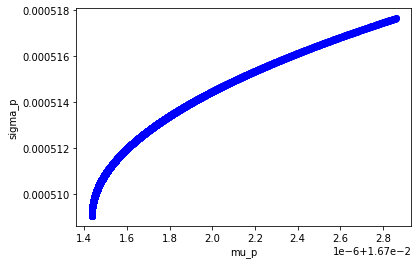

In [6]:
def frontier(batas_tau):
  tau = np.linspace(0, batas_tau, num=100000).tolist()
  lamda = []
  weight = []
  for i in range(0,len(tau)):
    a = e.T@icov@e
    b = (4*tau[i]*e.T@icov@mu) #+ (2*tau[i]*mu.T@icov@e)
    c = 2*(tau[i]**2)*mu.T@icov@mu - 1
    akar = np.sqrt((b**2) - (4*a*c))
    lam1 = -b + ((akar)/(2*a))
    lam2 = -b - ((akar)/(2*a))
    if lam1 > 0.0:
      lam = lam1.tolist()[0]
    elif lam2 > 0.0:
      lam = lam2.tolist()[0]
    else:
      lam = [0]

    lamda.append(lam[0])

  for i in range(0, len(lamda)):
    wa = 2*tau[i]*icov@mu + lamda[i]*icov@e
    wb = 2*tau[i]*e.T@icov@mu + lamda[i]*e.T@icov@e
    w = wa/wb
    weight.append(w.T[0])

  sum_w = []
  mu_p = []
  sig_p = []
  r_p = []
  for i in range (0, len(weight)):
    sw = sum(weight[i])
    sum_w.append(np.round(sw, decimals=2))
  
    mu_i = mu.T@weight[i]
    mu_p.append(mu_i[0])
  
    sig_i = np.sqrt(weight[i].T@cov@weight[i])
    sig_p.append(sig_i)
  
    r = mu_p[i]/sig_p[i]
    r_p.append(r)  

  bobot = np.array(weight).T.tolist()

  df = pd.DataFrame(data={'tau':tau, 'S1':bobot[0], 'S2':bobot[1], 'S3':bobot[2], 'S4':bobot[3], 'S5':bobot[4], 'mu':mu_p, 'sig':sig_p, 'r':r_p})
  df = df.loc[(df['S1']>=0)&(df['S2']>=0)&(df['S3']>=0)&(df['S4']>=0)&(df['S5']>=0)]
  optimum = df.loc[df['r'] == max(df['r'])]
  return (plt.plot(df['sig'], df['mu'], 'bo',), 
          plt.xlabel('mu_p'), 
          plt.ylabel('sigma_p'), 
          print(optimum))

frontier(0.002258)

([<matplotlib.lines.Line2D at 0x7fa986a21410>],
 Text(0.5, 0, 'mu_p'),
 Text(0, 0.5, 'r_p'))

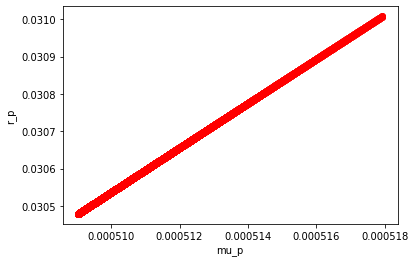

In [7]:
def plot_ratio(batas_tau):
  tau = np.linspace(0, batas_tau, num=100000).tolist()
  lamda = []
  weight = []
  for i in range(0,len(tau)):
    a = e.T@icov@e
    b = (4*tau[i]*e.T@icov@mu) #+ (2*tau[i]*mu.T@icov@e)
    c = 2*(tau[i]**2)*mu.T@icov@mu - 1
    akar = np.sqrt((b**2) - (4*a*c))
    lam1 = -b + ((akar)/(2*a))
    lam2 = -b - ((akar)/(2*a))
    if lam1 > 0.0:
      lam = lam1.tolist()[0]
    elif lam2 > 0.0:
      lam = lam2.tolist()[0]
    else:
      lam = [0]

    lamda.append(lam[0])

  for i in range(0, len(lamda)):
    wa = 2*tau[i]*icov@mu + lamda[i]*icov@e
    wb = 2*tau[i]*e.T@icov@mu + lamda[i]*e.T@icov@e
    w = wa/wb
    weight.append(w.T[0])

  sum_w = []
  mu_p = []
  sig_p = []
  r_p = []
  for i in range (0, len(weight)):
    sw = sum(weight[i])
    sum_w.append(np.round(sw, decimals=2))
  
    mu_i = mu.T@weight[i]
    mu_p.append(mu_i[0])
  
    sig_i = np.sqrt(weight[i].T@cov@weight[i])
    sig_p.append(sig_i)
  
    r = mu_p[i]/sig_p[i]
    r_p.append(r)  

  bobot = np.array(weight).T.tolist()

  df = pd.DataFrame(data={'tau':tau, 'S1':bobot[0], 'S2':bobot[1], 'S3':bobot[2], 'S4':bobot[3], 'S5':bobot[4], 'mu':mu_p, 'sig':sig_p, 'r':r_p})

  return (plt.plot(df['mu'], df['r'], 'ro',), 
          plt.xlabel('mu_p'), 
          plt.ylabel('r_p'))
  
plot_ratio(0.002258)